# The Straight Dope 学习

## 1. Manipulate data with ndarray in MXNET



In [1]:
import mxnet as mx
from mxnet import nd
mx.random.seed(129)

In [3]:
x = nd.empty((3,4))
x


[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
<NDArray 3x4 @cpu(0)>

In [5]:
x = nd.zeros((3,5))
x


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
<NDArray 3x5 @cpu(0)>

In [6]:
x = nd.ones((3,4))

In [7]:
x


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
<NDArray 3x4 @cpu(0)>

In [8]:
# 生成正态分布随机数
y = nd.random_normal(0,1,shape=(3,4))
y


[[-0.06449083  1.28410578 -0.2069474  -0.37605324]
 [ 0.10350066  0.61228293 -0.61772704 -0.52776241]
 [-0.67258716  0.49137086 -0.03870754 -0.21930574]]
<NDArray 3x4 @cpu(0)>

In [9]:
y.shape

(3, 4)

In [10]:
y.size

12

In [17]:
x + y


[[ 0.93550915  2.28410578  0.79305261  0.62394679]
 [ 1.1035006   1.61228299  0.38227296  0.47223759]
 [ 0.32741284  1.49137092  0.96129245  0.78069425]]
<NDArray 3x4 @cpu(0)>

In [18]:
x * y


[[-0.06449083  1.28410578 -0.2069474  -0.37605324]
 [ 0.10350066  0.61228293 -0.61772704 -0.52776241]
 [-0.67258716  0.49137086 -0.03870754 -0.21930574]]
<NDArray 3x4 @cpu(0)>

In [21]:
nd.dot(x,y.T)


[[ 0.63661432 -0.42970586 -0.43922958]
 [ 0.63661432 -0.42970586 -0.43922958]
 [ 0.63661432 -0.42970586 -0.43922958]]
<NDArray 3x3 @cpu(0)>

### In-place operations

+ 每一步的结果，其实需要分配新的memory，即指向了一个新的内存地址。

In [22]:
id(y)

4528389032

In [23]:
y=x+y
id(y) # y的指向已经发生了改变

4578702560

+ 可以将结果直接赋值给已经事先分配好的array中;使用切片

In [24]:
z = nd.zeros_like(x)
id(z)

4578841208

In [25]:
z[:] = x + y
id(z)

4578841208

In [26]:
z = x+y
id(z)  # 这样写的话就会指向新的内存地址

4578841488

但这样仍然会产生临时的buffer来存储结果，之后才会被传输给z；我们可以避免这一临时buffer的出现

In [27]:
nd.elemwise_add(x, y, out=z)


[[ 1.9355092   3.28410578  1.79305267  1.62394679]
 [ 2.1035006   2.61228299  1.38227296  1.47223759]
 [ 1.32741284  2.49137092  1.96129251  1.78069425]]
<NDArray 3x4 @cpu(0)>

In [28]:
id(z)

4578841488

In [29]:
# 如果不打算继续使用x，即可以在x上直接做操作
id(x)

4570565824

如果不打算继续使用x，即可以在x上直接做操作；
+ 使用切片 x[:]
+ 使用 += 号

In [30]:
x[:]=x+y

In [31]:
id(x)

4570565824

In [32]:
x += y

In [33]:
id(x)

4570565824

In [34]:
x


[[ 2.87101841  5.56821156  2.58610535  2.24789357]
 [ 3.20700121  4.22456598  1.76454592  1.94447517]
 [ 1.65482569  3.98274183  2.92258501  2.56138849]]
<NDArray 3x4 @cpu(0)>

## Linear Algebra
### Scalsrs
可以通过asscalar使得NDArray变为python中的floats

In [37]:
x = nd.array([3.0])
y = nd.array([4.0])
print('x + y =', x+y)

x + y = 
[ 7.]
<NDArray 1 @cpu(0)>


In [38]:
x / y


[ 0.75]
<NDArray 1 @cpu(0)>

In [40]:
x % y


[ 3.]
<NDArray 1 @cpu(0)>

In [41]:
x ** y


[ 81.]
<NDArray 1 @cpu(0)>

In [42]:
type(x)

mxnet.ndarray.NDArray

In [46]:
type(x.asscalar())

numpy.float32

### 向量

In [47]:
u = nd.arange(4)
u


[ 0.  1.  2.  3.]
<NDArray 4 @cpu(0)>

In [48]:
u.shape

(4,)

### Length, dimensionality,shape
order指代axes的个数，而dimension指代某一个axes元素的个数，shape是dimension的集合

### Matrices 矩阵
二维，order为2

In [51]:
A = nd.arange(20).reshape((4,5))
A


[[  0.   1.   2.   3.   4.]
 [  5.   6.   7.   8.   9.]
 [ 10.  11.  12.  13.  14.]
 [ 15.  16.  17.  18.  19.]]
<NDArray 4x5 @cpu(0)>

In [52]:
A[2,3]  # 可以直接索引


[ 13.]
<NDArray 1 @cpu(0)>

In [56]:
A[2,3].shape

(1,)

In [57]:
type(A[2,3])

mxnet.ndarray.NDArray

In [61]:
A[2,:]


[ 10.  11.  12.  13.  14.]
<NDArray 5 @cpu(0)>

In [62]:
A.T


[[  0.   5.  10.  15.]
 [  1.   6.  11.  16.]
 [  2.   7.  12.  17.]
 [  3.   8.  13.  18.]
 [  4.   9.  14.  19.]]
<NDArray 5x4 @cpu(0)>

### Tensor 张量
向量是order为1的tensor，矩阵是order为2的tensor

In [68]:
x = nd.arange(50).reshape((5,2,-1))
x


[[[  0.   1.   2.   3.   4.]
  [  5.   6.   7.   8.   9.]]

 [[ 10.  11.  12.  13.  14.]
  [ 15.  16.  17.  18.  19.]]

 [[ 20.  21.  22.  23.  24.]
  [ 25.  26.  27.  28.  29.]]

 [[ 30.  31.  32.  33.  34.]
  [ 35.  36.  37.  38.  39.]]

 [[ 40.  41.  42.  43.  44.]
  [ 45.  46.  47.  48.  49.]]]
<NDArray 5x2x5 @cpu(0)>

In [69]:
x.shape

(5, 2, 5)

### Element-wise operations
点对点的操作
### tensor的算术性质
点乘和加
### Sums and means


In [70]:
nd.sum(u)


[ 6.]
<NDArray 1 @cpu(0)>

In [71]:
A.shape

(4, 5)

In [73]:
# 矩阵的和
nd.sum(A)


[ 190.]
<NDArray 1 @cpu(0)>

In [74]:
nd.mean(A)


[ 9.5]
<NDArray 1 @cpu(0)>

### dot products
两个向量之间的dot products指的是外积

### matrix-vector products


In [81]:
A=A.reshape((5,4))

In [82]:
A.shape

(5, 4)

In [83]:
u.shape

(4,)

In [84]:
nd.dot(A,u)


[  14.   38.   62.   86.  110.]
<NDArray 5 @cpu(0)>

In [85]:
nd.dot(A,u).shape

(5,)

In [86]:
A = nd.ones(shape=(3, 4))
B = nd.ones(shape=(4, 5))
nd.dot(A, B)


[[ 4.  4.  4.  4.  4.]
 [ 4.  4.  4.  4.  4.]
 [ 4.  4.  4.  4.  4.]]
<NDArray 3x5 @cpu(0)>

### Norms 范数
范数满足的条件:
+ $||\alpha A||=|\alpha|||A||$
+ $||A+B|| \leq ||A|| + ||B||$ 
+ $||A|| \geq 0$
+ 任意元素为0，则$||A||=0$

In [87]:
# l2 norm
nd.norm(u)


[ 3.7416575]
<NDArray 1 @cpu(0)>

In [88]:
# l1 norm
nd.sum(nd.abs(u))


[ 6.]
<NDArray 1 @cpu(0)>

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random

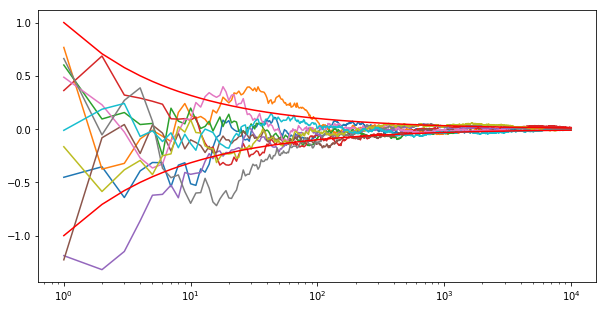

In [90]:
x = random.normal(size=(10000, 10))
# cumulative sum and normalization
y = np.arange(1, 10001).reshape(10000, 1)
z = np.cumsum(x, axis=0) / y

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.semilogx(y, z[:, i])

plt.semilogx(y, np.power(y, -0.5), 'r')
plt.semilogx(y, -np.power(y, -0.5), 'r')
plt.show()

## 3. Automatic differentiation with autograd
类似于pytoch的autograd，mxnet也会自动的求导，是一个动态图.

In [92]:
import mxnet as mx
import mxnet.ndarray as nd
import mxnet.autograd as ag
mx.random.seed(12)

### Attaching gradients
关于某一个函数求导，结果需要有地方存储，可以用attach_grad()来表示存储到这个array中去。

In [93]:
x = nd.array([[1,2],[3,4]])
x.attach_grad()  # 类似于placeholder

In [98]:
with ag.record():
    y = x * 2
    z = y * x

In [102]:
z.backward() # 计算梯度

$y=x*2,z=y*x,z=2x^2$，则$dy/dx=2,dz/dx=4x$

In [104]:
x


[[ 1.  2.]
 [ 3.  4.]]
<NDArray 2x2 @cpu(0)>

In [105]:
x.grad  # 可以看出，导数是4x


[[  4.   8.]
 [ 12.  16.]]
<NDArray 2x2 @cpu(0)>

### 链式法则
若想知道 dz/dy

In [108]:
with ag.record():
    y = x * 2
    z = y * x
    
head_gradient = nd.array([[10,1.],[.1,.01]])
z.backward(head_gradient)
x.grad


[[ 40.           8.        ]
 [  1.20000005   0.16      ]]
<NDArray 2x2 @cpu(0)>